In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


year: 2016 for all data points

month: number for month of the year

day: number for day of the year

week: day of the week as a character string

temp_2: max temperature 2 days prior

temp_1: max temperature 1 day prior

average: historical average max temperature

actual: max temperature measurement

friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [40]:
df.shape

(348, 12)

In [41]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [42]:
# the describe method gives us some basic stats about the data
# we can see that there are 348 rows of data

df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


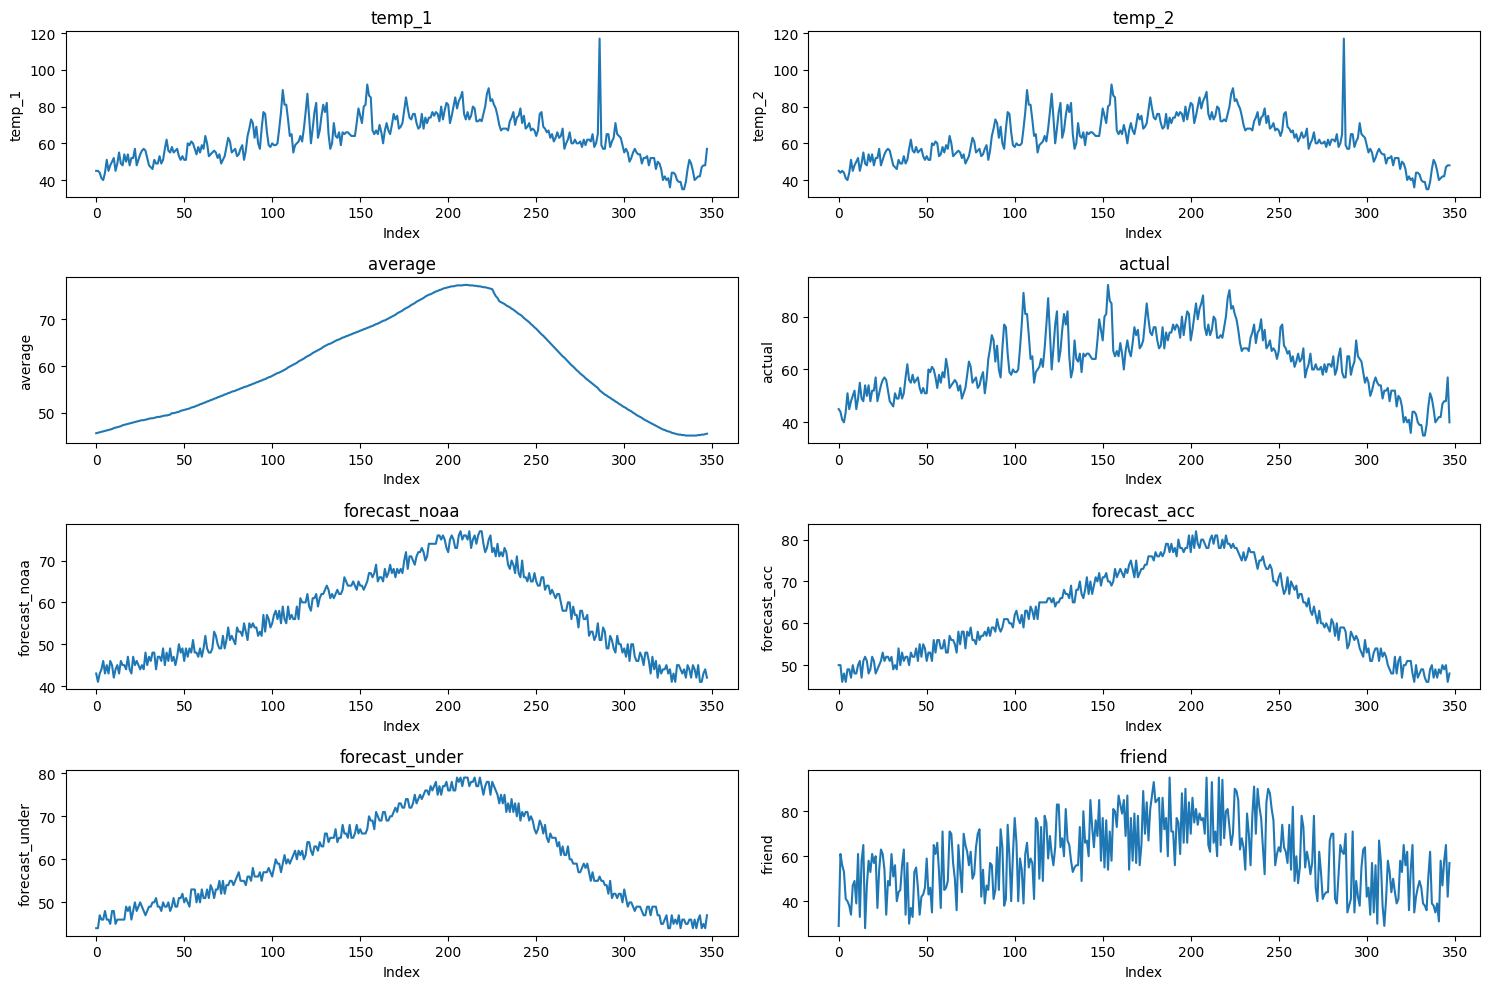

In [43]:
# generate 8 sublots
# in 4x2 grid

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# flatten axes into a 1D array
# so we can iterate over them
axes = axes.flatten()

# iterate over each column
# and plot the data using the index

cols = ['temp_1', 'temp_2', 'average', 'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend']
for i, col in enumerate(cols):
    # plot data
    axes[i].plot(df[col])
    # set title
    axes[i].set_title(col)
    # set x-axis label
    axes[i].set_xlabel('Index')
    # set y-axis label
    axes[i].set_ylabel(col)

# set layout to tight
# to avoid overlapping labels
plt.tight_layout()
plt.show()

In [44]:
# we can see that the data has one column which is not numeric : 'week'
# we will convert this column to a numeric column by using one-hot encoding
# we will use the pandas get_dummies method to do this

df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [45]:
# generate feature and label

X = df.drop('actual', axis=1)
y = df['actual']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 17)
(70, 17)
(278,)
(70,)


## Establish Baseline
Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [47]:
# The baseline predictions are the historical averages
baseline_preds = X_test['average']
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.09


## Training

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

## Evaluation

In [49]:
y_pred = rf.predict(X_test)

errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.89 degrees.


In [50]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse, 2), 'degrees.')

Mean Squared Error: 26.09 degrees.


In [51]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.85 %.


## Visualizing a Single Decision Tree
One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.

The following code takes one tree from the forest and saves it as an image.

In [52]:
rf.estimators_[5]

DecisionTreeRegressor(max_features=1.0, random_state=1201263687)

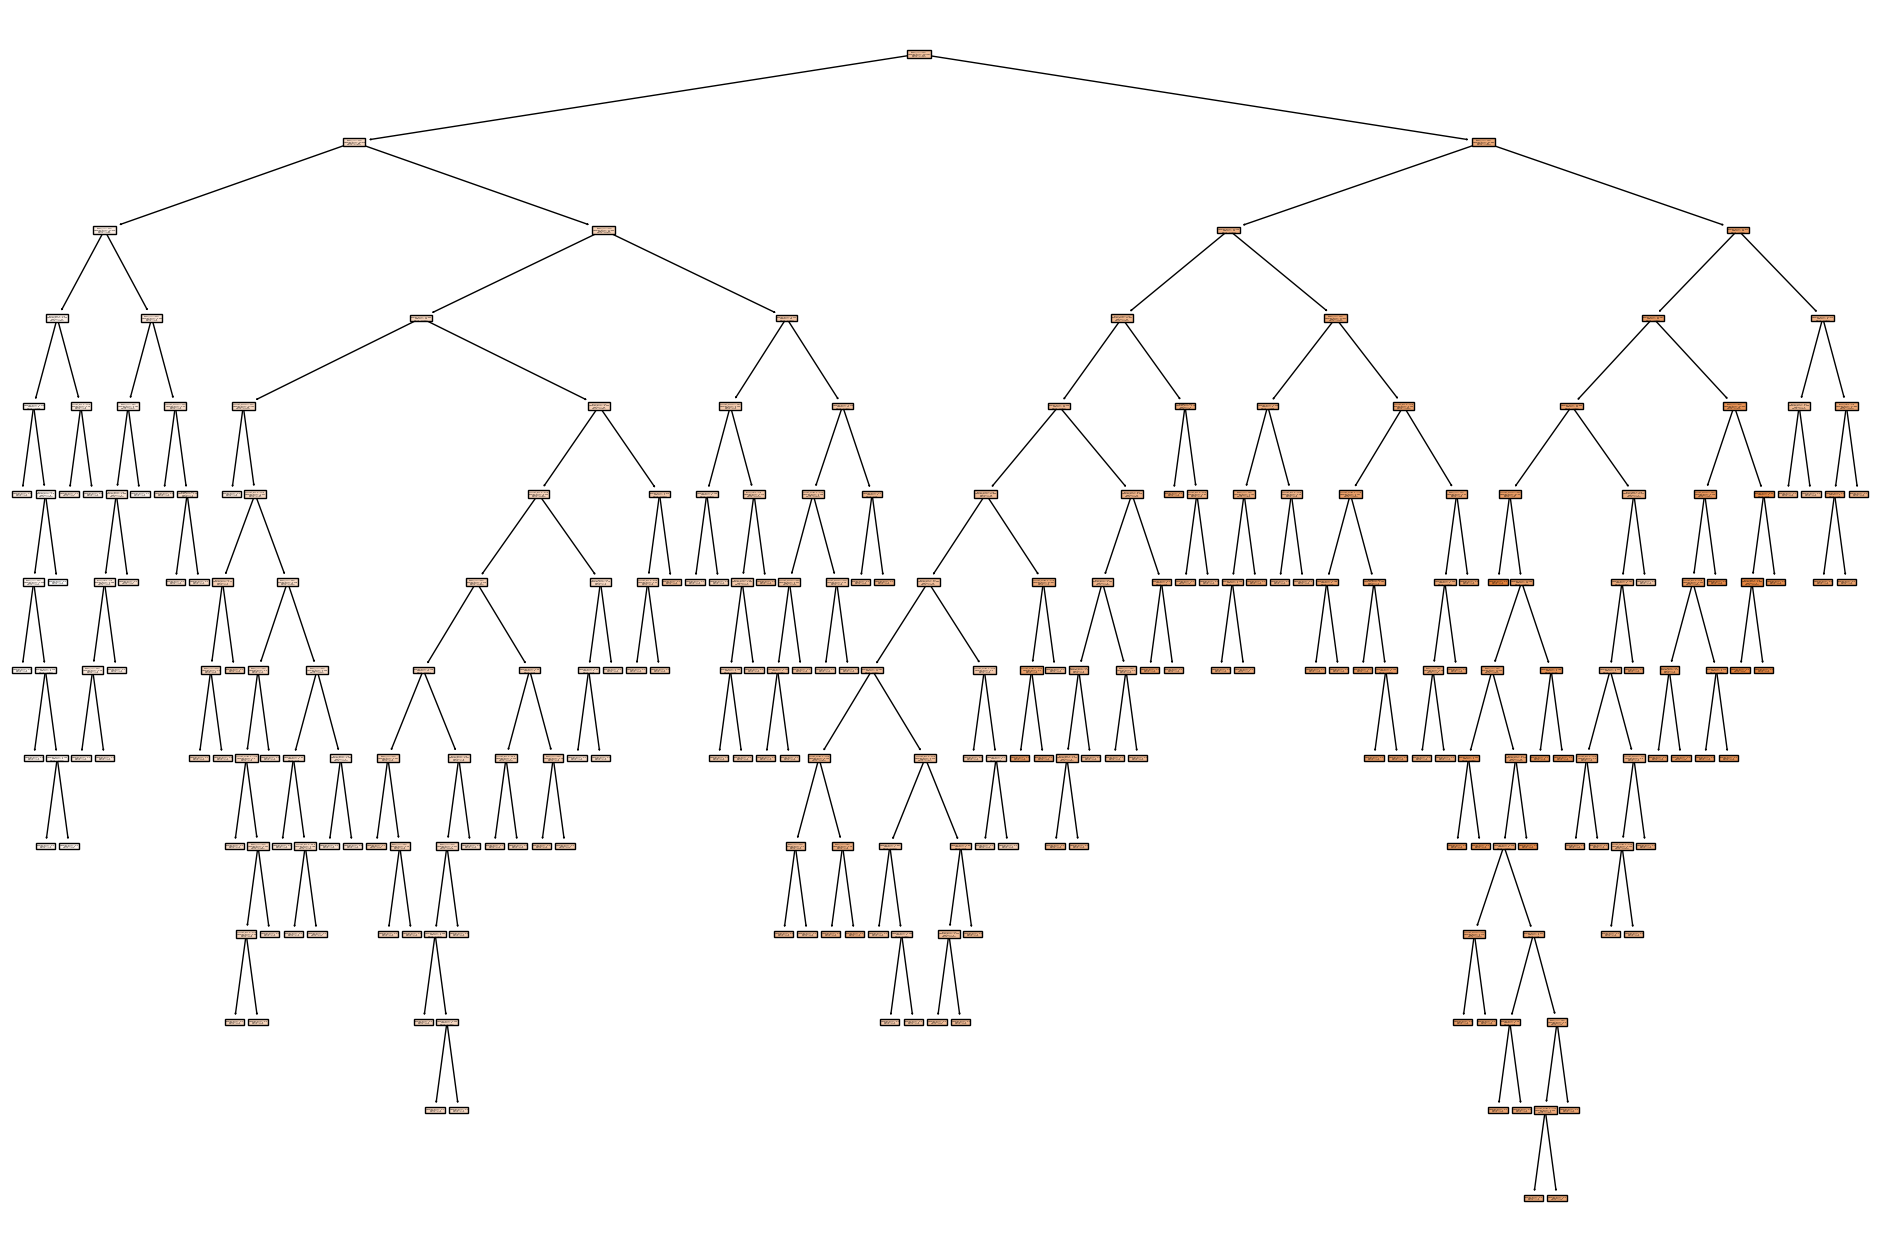

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))
plot_tree(rf.estimators_[5], filled=True, feature_names=X.columns)
plt.show()

Wow that's a big tree! Let's build a small rf with only 10 trees and limiting the depth to 3 levels.

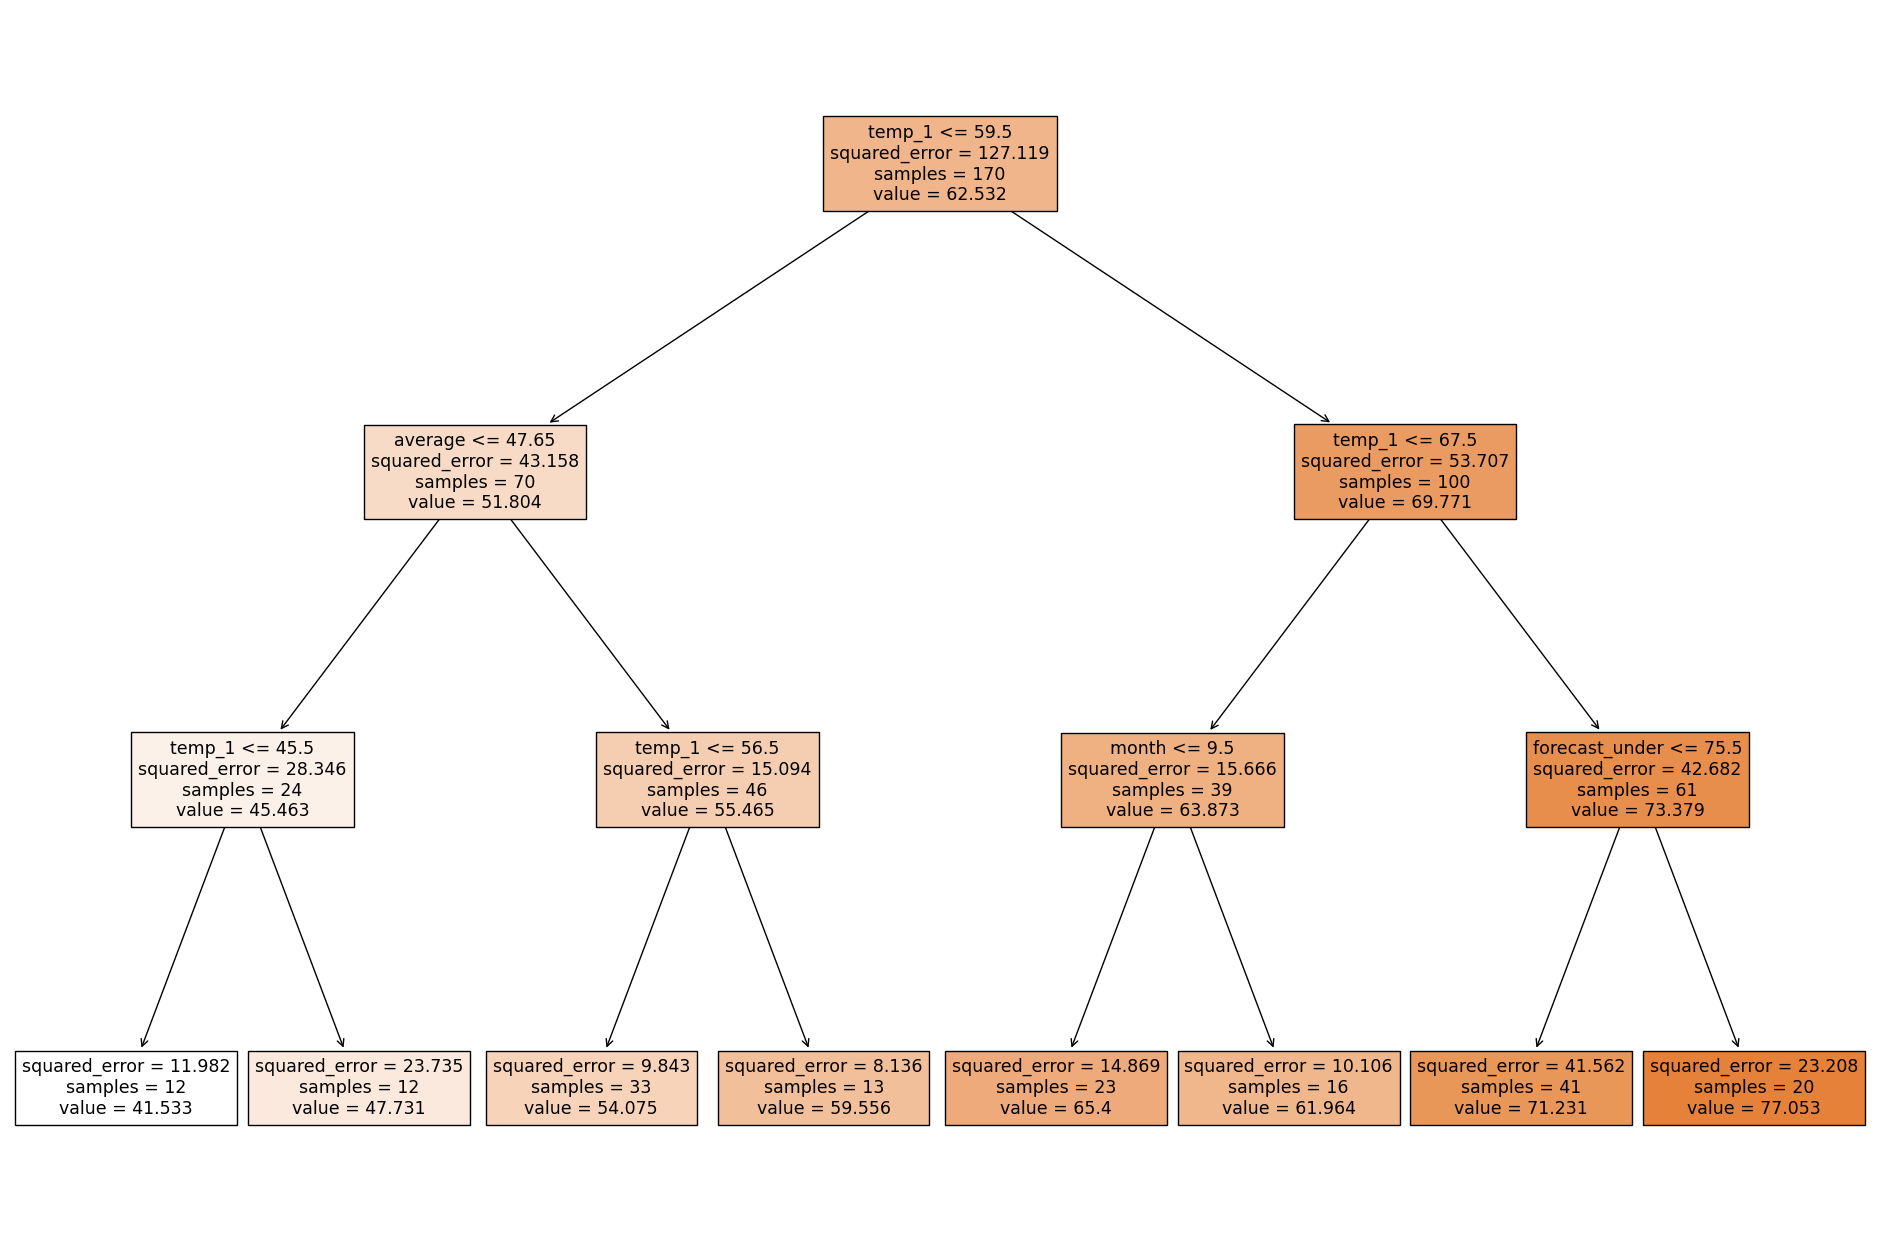

In [54]:
rf_small = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
rf_small.fit(X_train, y_train)

plt.figure(figsize=(24, 16))
plot_tree(rf_small.estimators_[9], filled=True, feature_names=X.columns)
plt.show()

In [55]:
# Feature Importance
# The higher the value, the more important the feature

feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False) 
feature_imp

temp_1            0.674038
average           0.149624
forecast_acc      0.048901
forecast_noaa     0.026115
friend            0.020831
day               0.020122
temp_2            0.017158
forecast_under    0.016290
month             0.010496
week_Sat          0.002994
week_Mon          0.002774
week_Fri          0.002764
week_Sun          0.002405
week_Tues         0.002105
week_Wed          0.001952
week_Thurs        0.001431
year              0.000000
dtype: float64

In [56]:
# Feature Importance
# The higher the value, the more important the feature

feature_imp = pd.Series(rf_small.feature_importances_, index = X.columns).sort_values(ascending = False) 
feature_imp

temp_1            0.739254
average           0.160180
forecast_acc      0.069557
friend            0.008156
forecast_under    0.007886
temp_2            0.007134
month             0.004811
forecast_noaa     0.003022
week_Sat          0.000000
week_Tues         0.000000
week_Thurs        0.000000
week_Sun          0.000000
year              0.000000
week_Mon          0.000000
week_Fri          0.000000
day               0.000000
week_Wed          0.000000
dtype: float64